<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>		
<font size=4>
<br/>
</div>

# Personal Data

In [1]:
# Set your student number
student_number = 99101608
Name = 'Melika'
Last_Name = 'Rajabi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch. 

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Libraries

In [3]:
import torch
import torchvision.datasets 
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [4]:
## FILL HERE

# Number of Samples in each Batch
batch_size = 32

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5,), (0.5, 0.5, 0.5))])
  
train_set = torchvision.datasets.CIFAR10(root='.', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


The transform contains $2$ elements therefore we used "Compose" command.

## Visualization

Visualize 1 random image from each class


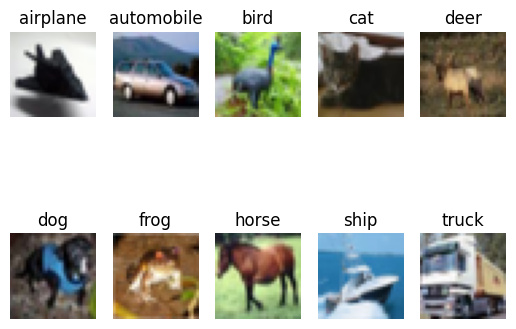

In [5]:
## FILL HERE

# Number of Classes
num_classes = len(train_set.classes)


sample_images = {}
for image, label in train_set:
  if label not in sample_images:
    sample_images[label] = image
  if len(sample_images) == num_classes:
    break

figure = plt.figure()
rows, cols = 2, 5
for label, image in sample_images.items():
  figure.add_subplot(rows, cols, label+1)

  image = image / 2 + 0.5
  image = image.numpy()
  image = image.transpose(1, 2, 0)

  plt.imshow(image)
  plt.title(train_set.classes[label])
  plt.axis("off")
plt.show()


This dataset contains color images. Therefore its dimensions are different from the previous Question which was FashionMNIST. It contains $32 \times 32$ images each having $3$ dimensions for RGB.

Therefore when plotting, first we unnormalized it then converted the image into numpy and then performed transpose on it.

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

  def __init__(self):
    super().__init__()

    ## FILL HERE
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.conv3 = nn.Conv2d(64, 64, 3)
    self.fc1 = nn.Linear(64*4*4, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    ## FILL HERE
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = F.relu(self.conv3(x))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


net = Net()

In this part, after defining the class we define the functions, init and forward. In the init we define our layers. We considered $3$ convolutional layers, $2$ linear layers and $1$ max pool. The shapes of the layers can be modified in order to get different accuracies. In the forward function, we perform the layers. We used ReLU, conv1, max pool, again ReLU, conv2, max pool, then ReLU, conv3, flattening, and finally, ReLU, and $2$ linear layers.

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [7]:
## FILL HERE

# Learning rate
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


In this part, we use the defined cross entropy loss and the optimizer functions in the torch. We've chosen the Adam optimizer which is popular in machine learning.

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [8]:

# Number of epochs
epoch_nums = 10
# Number of batches
batch_nums = len(train_loader)

# Loop over the dataset multiple times
for epoch in range(epoch_nums): 

  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):

    ## FILL HERE
    ## You should train the model and also print the running loss for each batch
    images, labels = data

    outputs = net(images)
    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()
    
    optimizer.zero_grad()

    running_loss += loss.item()

    print(f"Batch [{i+1}], Running Loss: {loss.item()}")

  print(f"Epoch [{epoch+1}], Running Loss: {running_loss/batch_nums}")

print('Finished Training')


Streaming output truncated to the last 5000 lines.
Batch [1258], Running Loss: 0.9000289440155029
Batch [1259], Running Loss: 0.5548074841499329
Batch [1260], Running Loss: 0.5874133110046387
Batch [1261], Running Loss: 0.6931781768798828
Batch [1262], Running Loss: 0.43949440121650696
Batch [1263], Running Loss: 0.9875581860542297
Batch [1264], Running Loss: 0.5617747902870178
Batch [1265], Running Loss: 0.5314735770225525
Batch [1266], Running Loss: 0.684424102306366
Batch [1267], Running Loss: 0.7898324728012085
Batch [1268], Running Loss: 0.6215572953224182
Batch [1269], Running Loss: 0.5078705549240112
Batch [1270], Running Loss: 0.6838406920433044
Batch [1271], Running Loss: 0.4472709894180298
Batch [1272], Running Loss: 0.6809839010238647
Batch [1273], Running Loss: 0.5136397480964661
Batch [1274], Running Loss: 0.8398112654685974
Batch [1275], Running Loss: 0.6096644997596741
Batch [1276], Running Loss: 0.46017834544181824
Batch [1277], Running Loss: 0.6787698268890381
Batch [1

For each epoch and for each batch in the epoch , we first store the actual labels and the outputs for images in the batch. Using the outputs, we compute the loss. The next steps are backward, optimizing and making the gradients zero. We also add the loss of each batch to the running loss of the epoch. After each epoch we devide this number by the number of batches and print it.

## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [9]:

correct = 0
total = len(test_loader.dataset)

# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():

  for data in test_loader:
    ## FILL HERE

    images, labels = data
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 71 %


In this part, we iterate over the test set and apply the same steps as for the train set. We compute the outputs, predict the labels based on the argmax of the outputs and compare them with the true labels. In the end, we devide the number of correct predictions by the total numebr of samples to result in the accuracy.

Here, we also calculate the model performance for each class as well.

In [10]:

# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in train_set.classes}
total_pred = {classname: 0 for classname in train_set.classes}

# Again no gradients needed
with torch.no_grad():
  for data in test_loader:
    ## FILL HERE
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    for label, pred in zip(labels, predicted):
      classname = train_set.classes[label]
      correct_pred[classname] += (pred == label)
      total_pred[classname] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Accuracy for class: airplane is 79.0 %
Accuracy for class: automobile is 76.8 %
Accuracy for class: bird  is 58.9 %
Accuracy for class: cat   is 44.2 %
Accuracy for class: deer  is 71.3 %
Accuracy for class: dog   is 70.8 %
Accuracy for class: frog  is 67.0 %
Accuracy for class: horse is 84.5 %
Accuracy for class: ship  is 80.2 %
Accuracy for class: truck is 80.9 %


In this part, we repeat the same commands as the previous part. But the difference is that the correct predictions and total predictions and so the accuracies are calculated separately for each class. Therefore their data types are dictionaries. For each batch, when we found the predicted labels, we iterate over the labels and add the correct and total predictions to the corresponding key in the dictionaries.